In [1]:
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a dark background
sns.set_style("whitegrid")

In [2]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix


In [3]:
# Read in your csv file that has the mid features. 

#data = pd.read_csv('../Feature Extraction/midFeaturesTrainSet.csv')
data = pd.read_csv('midFeaturesTrainFinal2.csv')
print(data.shape)

(4876, 140)


In [4]:
data.head()

,FileID,actorID,Emotion,SentenceID,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,...,delta chroma_4_std,delta chroma_5_std,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std
0,1001_DFA_ANG_XX,1001,ANG,DFA,0.121740,0.010421,2.983526,0.216327,0.225219,0.932025,...,0.019988,0.018907,0.020462,0.016111,0.006406,0.007840,0.013986,0.014026,0.003441,0.007750
1,1001_DFA_DIS_XX,1001,DIS,DFA,0.161743,0.006530,2.940205,0.246532,0.212951,1.265724,...,0.021510,0.024405,0.024236,0.024355,0.008880,0.002610,0.004799,0.011605,0.003827,0.010198
2,1001_DFA_FEA_XX,1001,FEA,DFA,0.158708,0.015425,2.973619,0.252136,0.225729,1.245681,...,0.007116,0.003273,0.007960,0.058401,0.010373,0.003830,0.009172,0.025511,0.005837,0.017773
3,1001_DFA_HAP_XX,1001,HAP,DFA,0.159097,0.005760,2.937929,0.229749,0.208469,1.379728,...,0.014083,0.006455,0.007594,0.043598,0.007653,0.011884,0.015029,0.013349,0.014063,0.012297
4,1001_DFA_NEU_XX,1001,NEU,DFA,0.164732,0.008302,2.892321,0.264956,0.227461,1.380184,...,0.024043,0.014561,0.020798,0.051023,0.011482,0.004178,0.002889,0.015255,0.007335,0.016231


In [5]:
# Split the data into train and test set, stratified by Emotion.
data_train, data_test = train_test_split(data.copy(),
                                   shuffle=True,
                                   random_state=608,
                                   stratify=data.Emotion,
                                   test_size=0.2
                                   )

In [6]:
data.sample(5)

,FileID,actorID,Emotion,SentenceID,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,...,delta chroma_4_std,delta chroma_5_std,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std
2743,1054_IOM_FEA_XX,1054,FEA,IOM,0.075922,0.044177,3.012090,0.167365,0.199021,0.527189,...,0.028166,0.035275,0.040611,0.045657,0.001703,0.011754,0.003010,0.011764,0.008555,0.017342
3474,1067_DFA_HAP_XX,1067,HAP,DFA,0.078996,0.025795,2.860396,0.165024,0.214901,0.360761,...,0.028281,0.030014,0.014496,0.019076,0.007318,0.014901,0.013328,0.025354,0.014277,0.012169
700,1014_MTI_ANG_XX,1014,ANG,MTI,0.139551,0.021825,2.976367,0.229024,0.204458,1.028649,...,0.008641,0.030088,0.015153,0.016247,0.015064,0.019506,0.022380,0.010893,0.007246,0.011131
3922,1075_TIE_ANG_XX,1075,ANG,TIE,0.181559,0.006310,2.783267,0.247114,0.200281,0.833267,...,0.009661,0.018928,0.022108,0.023179,0.005551,0.010103,0.018776,0.024117,0.014706,0.011819
2623,1052_ITS_NEU_XX,1052,NEU,ITS,0.187263,0.020159,2.921041,0.255647,0.219888,1.016362,...,0.009052,0.009663,0.017175,0.026572,0.007284,0.009402,0.009960,0.019128,0.004890,0.010781


In [7]:
# Check the percentages of the different emotion categories in the training set

data_train.Emotion.value_counts(normalize=True)

NEU    0.178718
HAP    0.164359
FEA    0.164359
ANG    0.164359
SAD    0.164103
DIS    0.164103
Name: Emotion, dtype: float64

In [8]:
# Check the percentages of the different emotion categories in the test set

data_test.Emotion.value_counts(normalize=True)

NEU    0.179303
DIS    0.164959
ANG    0.163934
SAD    0.163934
FEA    0.163934
HAP    0.163934
Name: Emotion, dtype: float64

## Subsets of emotions


In [9]:
import itertools

In [10]:
emotions = np.unique(data_train[['Emotion']])
for emotion_list in itertools.combinations(emotions, 3):
    print(emotion_list)

('ANG', 'DIS', 'FEA')
('ANG', 'DIS', 'HAP')
('ANG', 'DIS', 'NEU')
('ANG', 'DIS', 'SAD')
('ANG', 'FEA', 'HAP')
('ANG', 'FEA', 'NEU')
('ANG', 'FEA', 'SAD')
('ANG', 'HAP', 'NEU')
('ANG', 'HAP', 'SAD')
('ANG', 'NEU', 'SAD')
('DIS', 'FEA', 'HAP')
('DIS', 'FEA', 'NEU')
('DIS', 'FEA', 'SAD')
('DIS', 'HAP', 'NEU')
('DIS', 'HAP', 'SAD')
('DIS', 'NEU', 'SAD')
('FEA', 'HAP', 'NEU')
('FEA', 'HAP', 'SAD')
('FEA', 'NEU', 'SAD')
('HAP', 'NEU', 'SAD')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS')


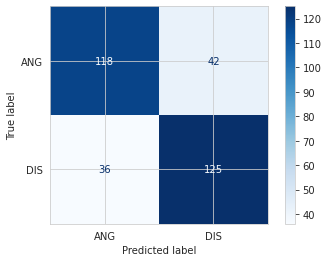

Overall accuracy
0.7570093457943925
('ANG', 'FEA')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


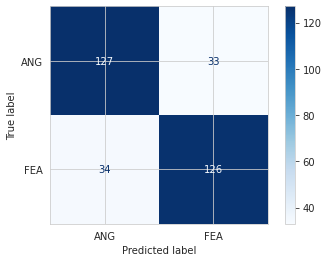

Overall accuracy
0.790625
('ANG', 'HAP')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


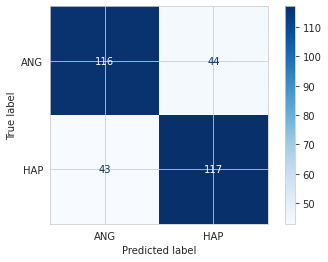

Overall accuracy
0.728125
('ANG', 'NEU')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


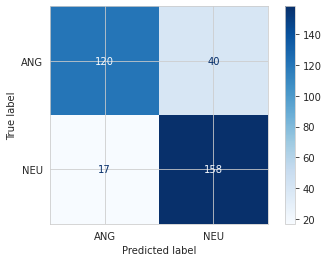

Overall accuracy
0.8298507462686567
('ANG', 'SAD')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


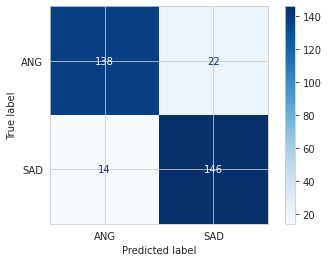

Overall accuracy
0.8875
('DIS', 'FEA')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


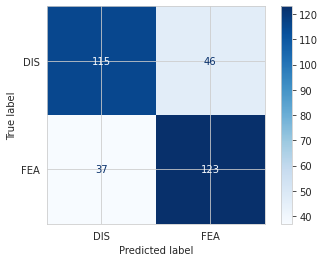

Overall accuracy
0.7414330218068536
('DIS', 'HAP')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


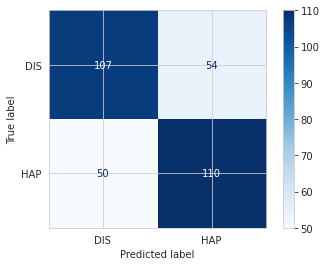

Overall accuracy
0.67601246105919
('DIS', 'NEU')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


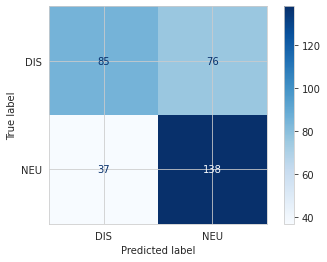

Overall accuracy
0.6636904761904762
('DIS', 'SAD')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


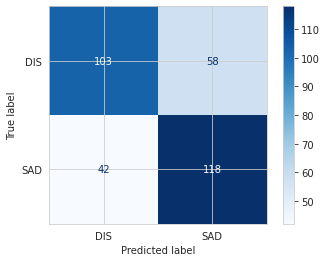

Overall accuracy
0.6884735202492211
('FEA', 'HAP')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


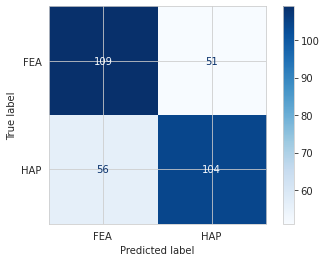

Overall accuracy
0.665625
('FEA', 'NEU')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


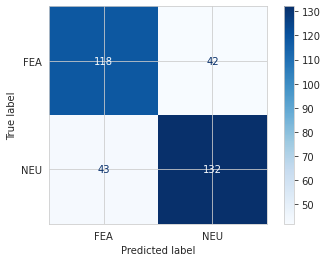

Overall accuracy
0.746268656716418
('FEA', 'SAD')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


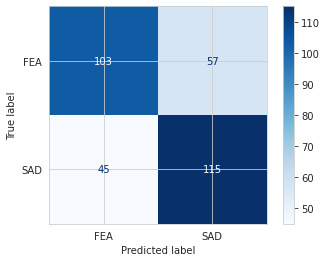

Overall accuracy
0.68125
('HAP', 'NEU')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


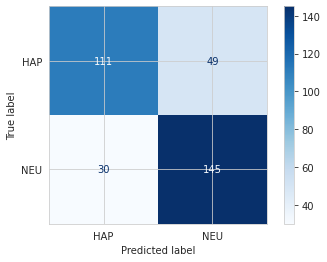

Overall accuracy
0.764179104477612
('HAP', 'SAD')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


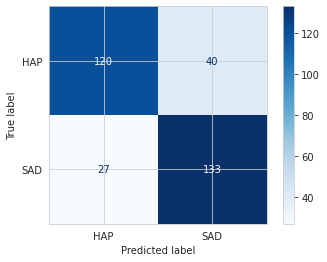

Overall accuracy
0.790625
('NEU', 'SAD')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


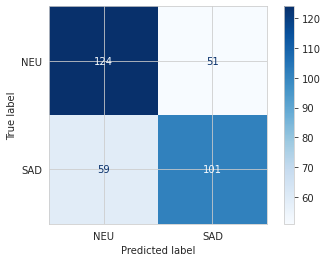

Overall accuracy
0.6716417910447762


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'FEA')


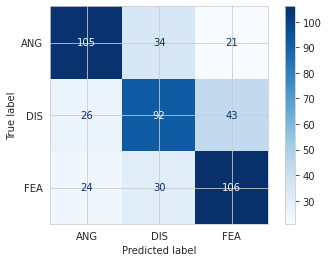

Overall accuracy
0.6299376299376299


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'HAP')


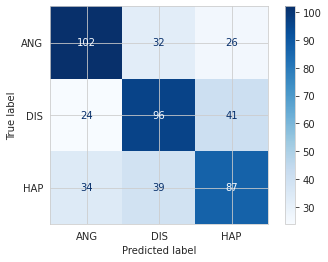

Overall accuracy
0.5925155925155925


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'NEU')


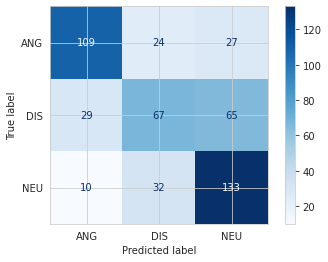

Overall accuracy
0.6229838709677419


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'SAD')


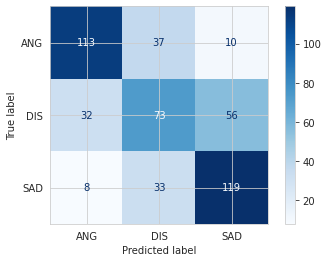

Overall accuracy
0.6340956340956341


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'FEA', 'HAP')


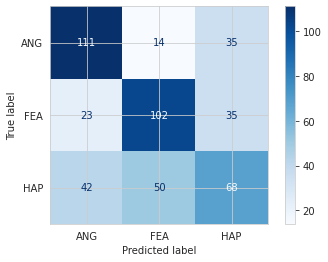

Overall accuracy
0.5854166666666667


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'FEA', 'NEU')


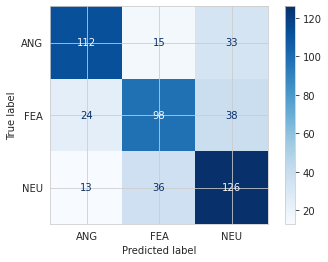

Overall accuracy
0.6787878787878788


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'FEA', 'SAD')


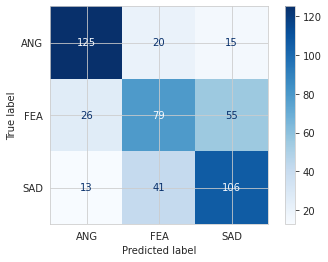

Overall accuracy
0.6458333333333334


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'HAP', 'NEU')


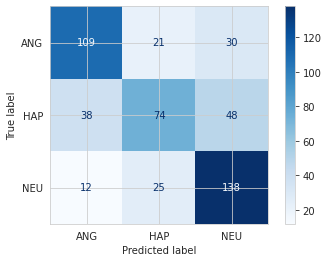

Overall accuracy
0.6484848484848484


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'HAP', 'SAD')


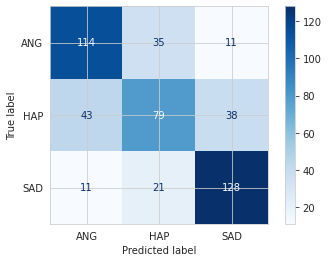

Overall accuracy
0.66875


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'NEU', 'SAD')


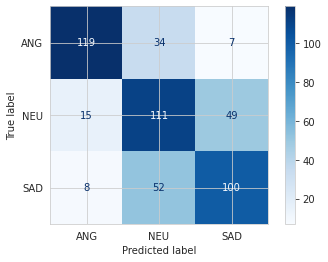

Overall accuracy
0.6666666666666666


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'FEA', 'HAP')


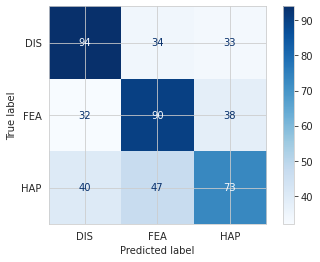

Overall accuracy
0.5343035343035343


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'FEA', 'NEU')


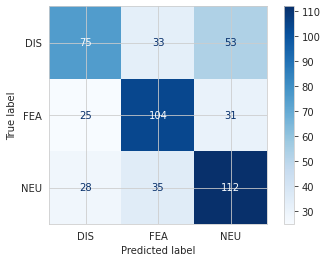

Overall accuracy
0.5866935483870968


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'FEA', 'SAD')


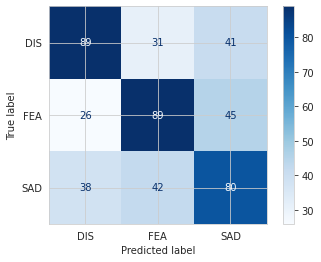

Overall accuracy
0.5363825363825364


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'HAP', 'NEU')


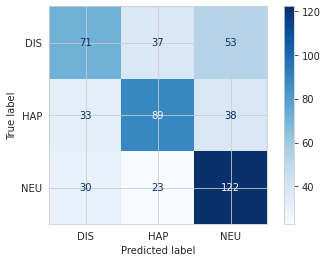

Overall accuracy
0.5685483870967742


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'HAP', 'SAD')


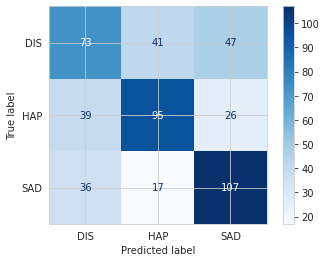

Overall accuracy
0.5717255717255717


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'NEU', 'SAD')


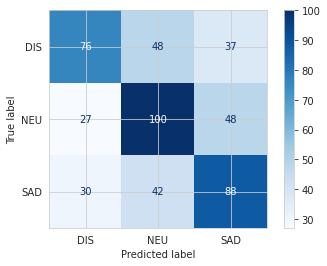

Overall accuracy
0.532258064516129


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('FEA', 'HAP', 'NEU')


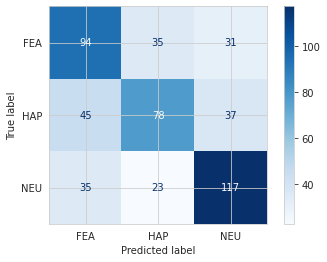

Overall accuracy
0.5838383838383838


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('FEA', 'HAP', 'SAD')


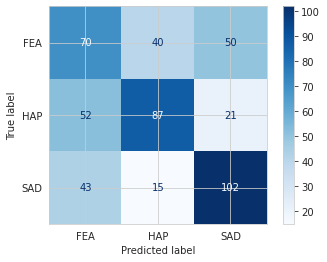

Overall accuracy
0.5395833333333333


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('FEA', 'NEU', 'SAD')


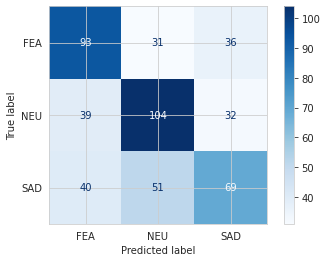

Overall accuracy
0.5373737373737374


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('HAP', 'NEU', 'SAD')


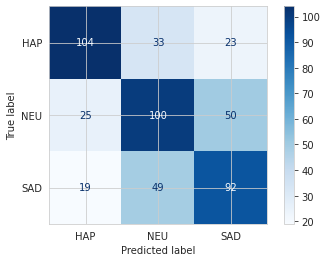

Overall accuracy
0.597979797979798


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'FEA', 'HAP')


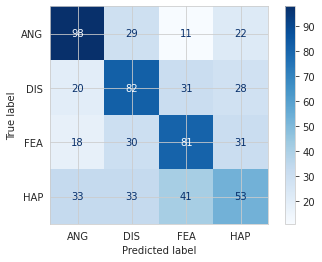

Overall accuracy
0.48985959438377535


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'FEA', 'NEU')


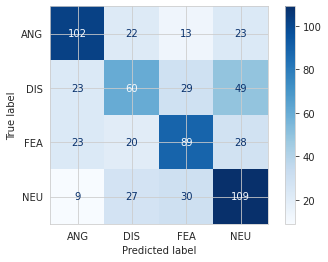

Overall accuracy
0.5487804878048781


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'FEA', 'SAD')


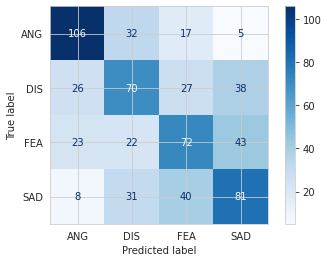

Overall accuracy
0.5132605304212169


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'HAP', 'NEU')


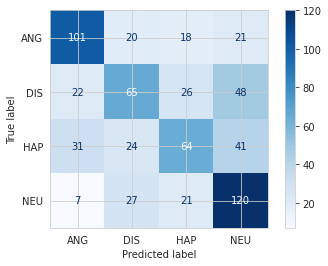

Overall accuracy
0.5335365853658537


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'HAP', 'SAD')


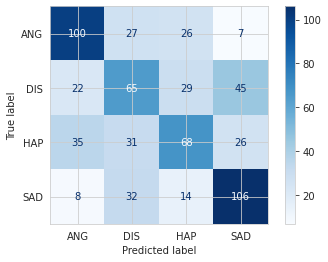

Overall accuracy
0.5288611544461779


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'NEU', 'SAD')


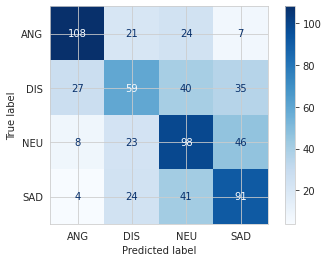

Overall accuracy
0.5426829268292683


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'FEA', 'HAP', 'NEU')


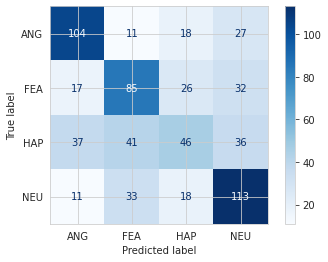

Overall accuracy
0.5312977099236641


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'FEA', 'HAP', 'SAD')


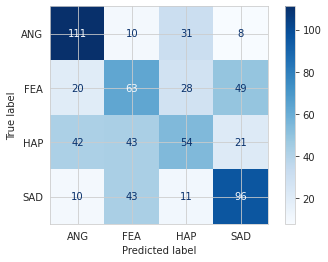

Overall accuracy
0.50625


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'FEA', 'NEU', 'SAD')


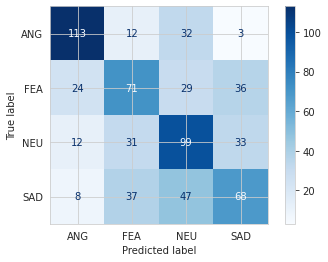

Overall accuracy
0.5358778625954198


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'HAP', 'NEU', 'SAD')


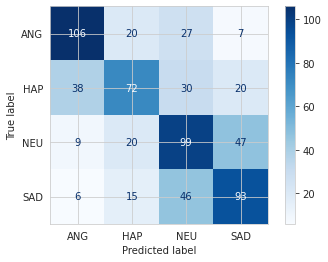

Overall accuracy
0.5648854961832062


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'FEA', 'HAP', 'NEU')


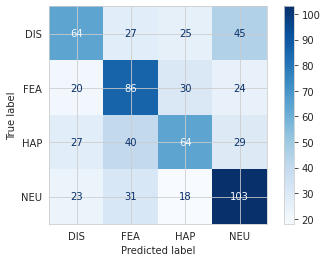

Overall accuracy
0.48323170731707316


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'FEA', 'HAP', 'SAD')


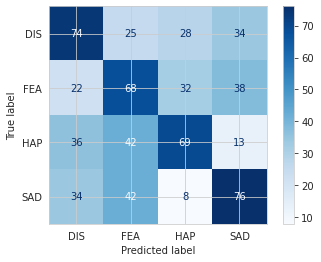

Overall accuracy
0.44773790951638065


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'FEA', 'NEU', 'SAD')


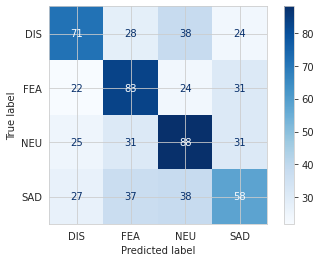

Overall accuracy
0.4573170731707317


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'HAP', 'NEU', 'SAD')


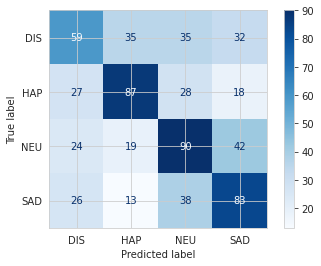

Overall accuracy
0.48628048780487804


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('FEA', 'HAP', 'NEU', 'SAD')


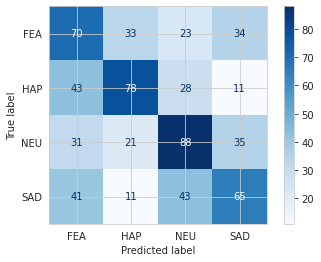

Overall accuracy
0.4595419847328244


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'FEA', 'HAP', 'NEU')


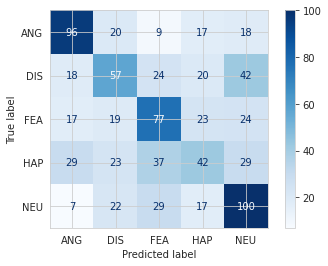

Overall accuracy
0.45588235294117646


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'FEA', 'HAP', 'SAD')


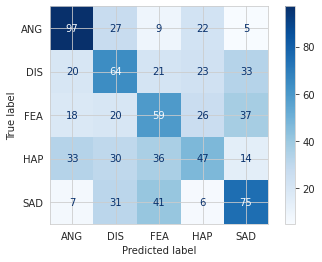

Overall accuracy
0.42696629213483145


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'FEA', 'NEU', 'SAD')


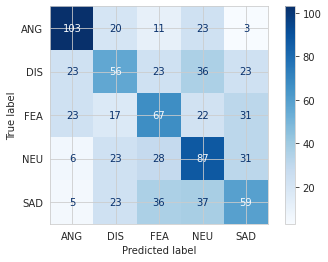

Overall accuracy
0.45588235294117646


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'HAP', 'NEU', 'SAD')


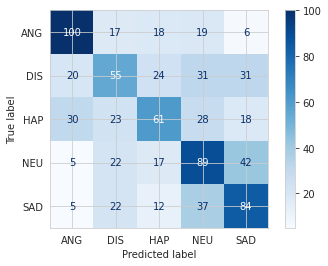

Overall accuracy
0.47671568627450983


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'FEA', 'HAP', 'NEU', 'SAD')


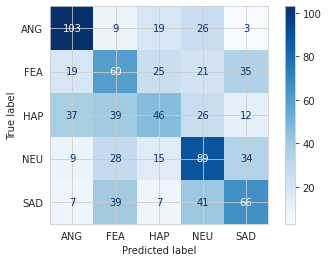

Overall accuracy
0.4466257668711656


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'FEA', 'HAP', 'NEU', 'SAD')


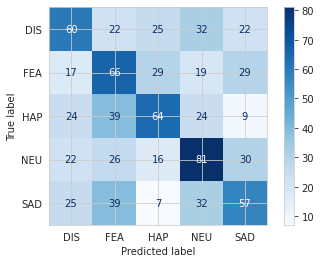

Overall accuracy
0.4019607843137255


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD')


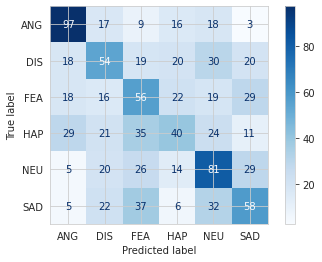

Overall accuracy
0.39549180327868855


In [11]:
models = []
accuracies = []
for n in range(2,7):
    acc_list = []
    mod_list = []
    for emotion_list in itertools.combinations(emotions, n):
        # Original dataset
        y_train = data_train[['Emotion']]
        y_test  = data_test[['Emotion']]

        X_train = data_train.drop(columns  = ['FileID','actorID', 'Emotion', 'SentenceID'])
        X_test  = data_test.drop(columns   = ['FileID','actorID', 'Emotion', 'SentenceID'])

        # Drop most emotions
        I_train = y_train.isin(emotion_list)
        I_test = y_test.isin(emotion_list)

        X_train = X_train[I_train.values]
        X_test = X_test[I_test.values]

        y_train = y_train.loc[y_train.Emotion.isin(emotion_list),:]
        y_test = y_test.loc[y_test.Emotion.isin(emotion_list),:]

        # Build pipeline to first scale the mid feature data, then apply the SVC
        pipe = Pipeline([('scale', StandardScaler()),
                         ('svc', SVC(kernel='rbf'))])
        classifier = pipe.fit(X_train, y_train)
        pred = pipe.predict(X_test)

        # Look at the confusion matrix for the test data :
        cnf_matrix_test = confusion_matrix(y_test, pred)

        # Plot confusion matrix
        print(emotion_list)
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                         display_labels=emotion_list,
                                         cmap=plt.cm.Blues)
        plt.show()

        M = confusion_matrix(y_test, classifier.predict(X_test))
        print('Overall accuracy')
        acc = np.sum(np.diag(M))/np.sum(M[:])
        print(acc)

        acc_list.append((emotion_list, acc))
        mod_list.append((emotion_list, classifier))
    accuracies.append(acc_list)
    models.append(mod_list)

In [12]:
for n in range(2,7):
    acc_list = accuracies[n-2]
    print('Chance with n=%i' %n)
    print(round(1/n,5))
    print('Obtained:')
    print(np.mean([acc[1] for acc in acc_list]))

Chance with n=2
0.5
Obtained:
0.7388206082405067
Chance with n=3
0.33333
Obtained:
0.5981079508196443
Chance with n=4
0.25
Obtained:
0.5086267673663566
Chance with n=5
0.2
Obtained:
0.44400553924609754
Chance with n=6
0.16667
Obtained:
0.39549180327868855


### Try this on the test set


In [15]:
# Read in your csv file that has the mid features. 

data_test_final = pd.read_csv('../Data/Mid_features/midFeaturesTestFinal2.csv')
print(data_test_final.shape)

y_test_final  = data_test_final[['Emotion']]
X_test_final  = data_test_final.drop(columns   = ['FileID','actorID', 'Emotion', 'SentenceID'])

(1200, 140)


In [17]:
y_test_final

,Emotion
0,ANG
1,DIS
2,FEA
3,HAP
4,NEU
...,...
1195,DIS
1196,FEA
1197,HAP
1198,NEU


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS')


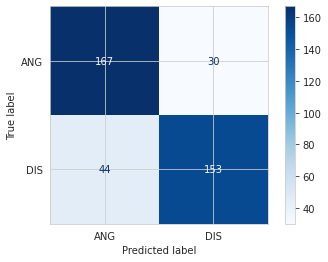

Overall accuracy
0.8121827411167513
('ANG', 'FEA')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


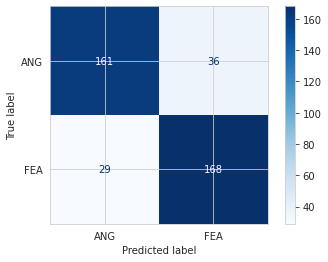

Overall accuracy
0.8350253807106599
('ANG', 'HAP')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


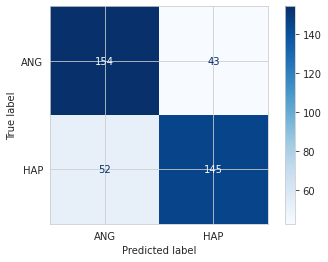

Overall accuracy
0.7588832487309645
('ANG', 'NEU')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


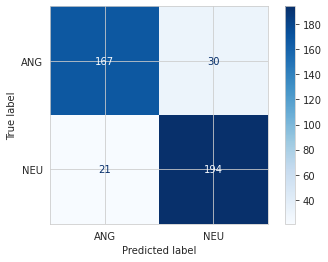

Overall accuracy
0.8762135922330098
('ANG', 'SAD')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


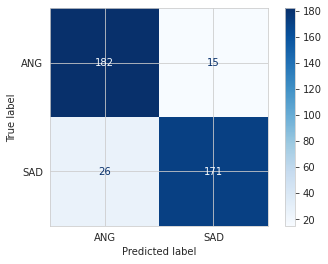

Overall accuracy
0.8959390862944162
('DIS', 'FEA')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


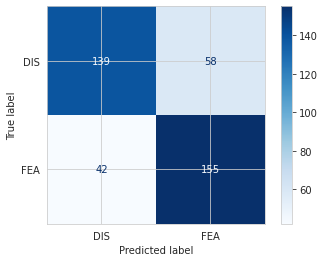

Overall accuracy
0.7461928934010152
('DIS', 'HAP')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


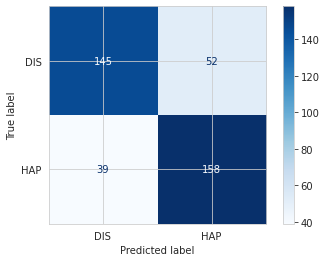

Overall accuracy
0.7690355329949239
('DIS', 'NEU')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


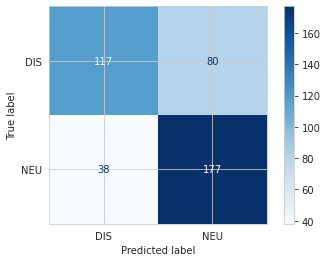

Overall accuracy
0.7135922330097088
('DIS', 'SAD')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


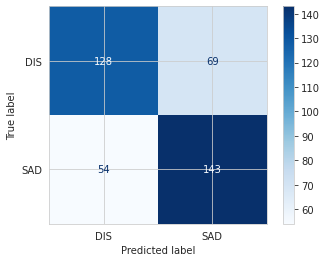

Overall accuracy
0.6878172588832487
('FEA', 'HAP')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


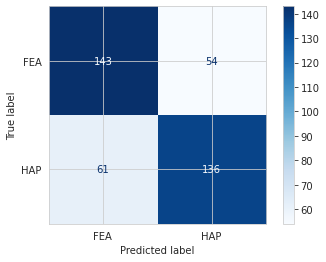

Overall accuracy
0.7081218274111675
('FEA', 'NEU')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


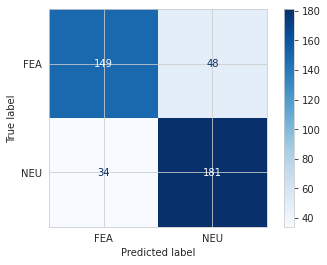

Overall accuracy
0.8009708737864077
('FEA', 'SAD')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


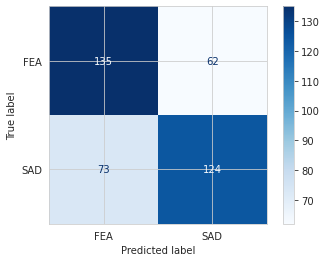

Overall accuracy
0.6573604060913706
('HAP', 'NEU')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


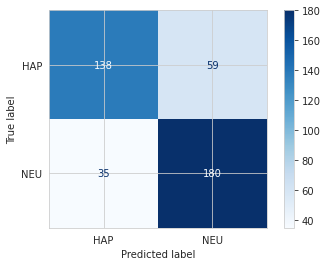

Overall accuracy
0.7718446601941747
('HAP', 'SAD')


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


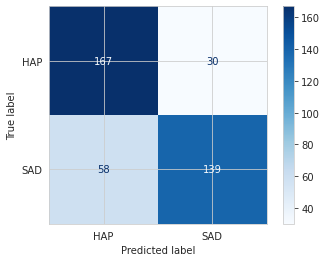

Overall accuracy
0.7766497461928934


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('NEU', 'SAD')


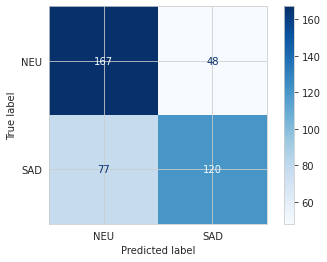

Overall accuracy
0.6966019417475728


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'FEA')


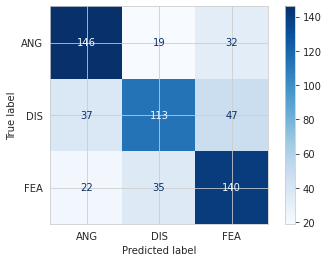

Overall accuracy
0.6751269035532995


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'HAP')


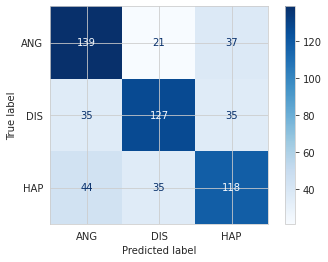

Overall accuracy
0.649746192893401


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'NEU')


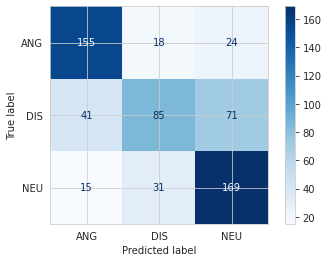

Overall accuracy
0.6715927750410509


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'SAD')


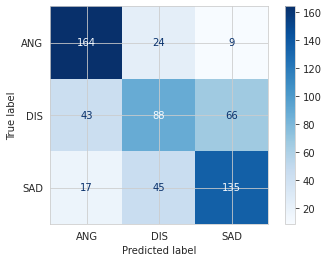

Overall accuracy
0.6548223350253807


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'FEA', 'HAP')


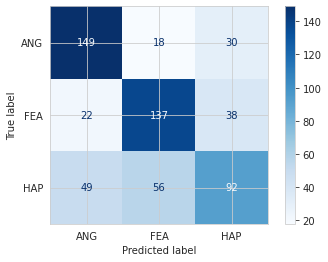

Overall accuracy
0.6395939086294417


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'FEA', 'NEU')


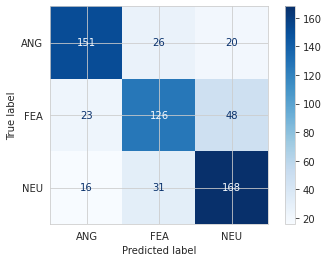

Overall accuracy
0.7307060755336617


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'FEA', 'SAD')


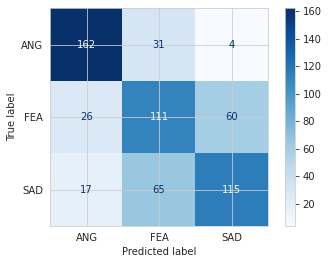

Overall accuracy
0.6565143824027073


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'HAP', 'NEU')


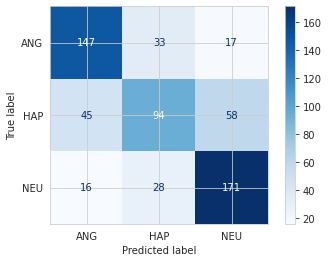

Overall accuracy
0.6765188834154351


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'HAP', 'SAD')


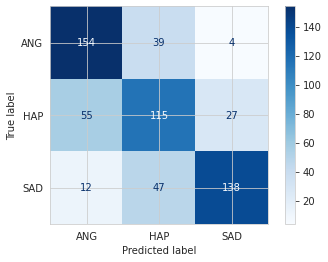

Overall accuracy
0.688663282571912


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'NEU', 'SAD')


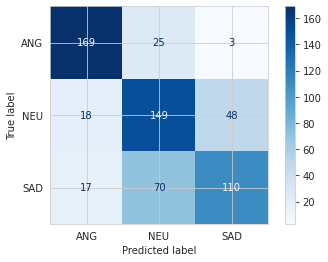

Overall accuracy
0.7027914614121511


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'FEA', 'HAP')


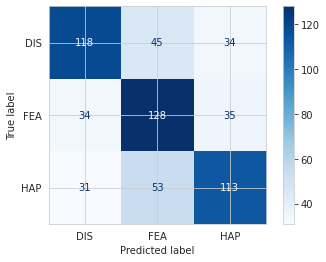

Overall accuracy
0.6074450084602369


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'FEA', 'NEU')


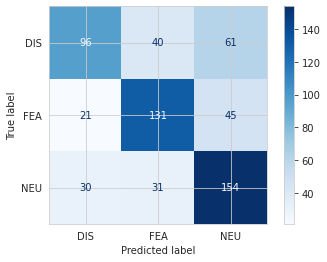

Overall accuracy
0.625615763546798


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'FEA', 'SAD')


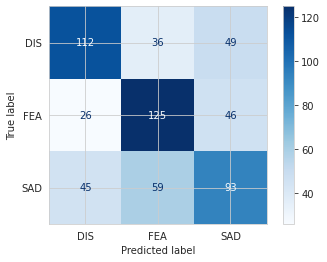

Overall accuracy
0.5583756345177665


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'HAP', 'NEU')


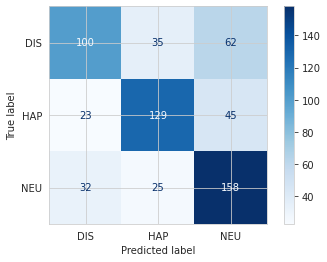

Overall accuracy
0.6354679802955665


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'HAP', 'SAD')


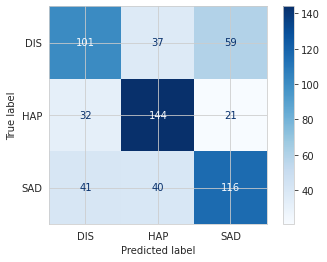

Overall accuracy
0.61082910321489


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'NEU', 'SAD')


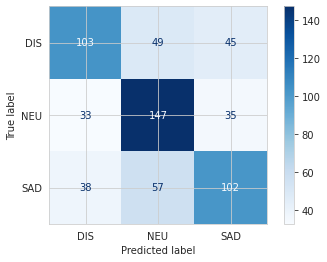

Overall accuracy
0.5779967159277504


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('FEA', 'HAP', 'NEU')


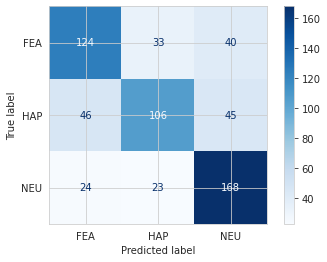

Overall accuracy
0.6535303776683087


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('FEA', 'HAP', 'SAD')


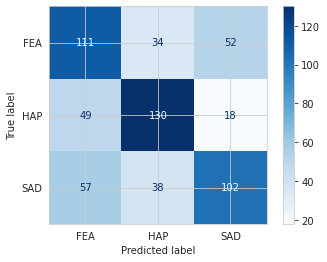

Overall accuracy
0.5803722504230119


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('FEA', 'NEU', 'SAD')


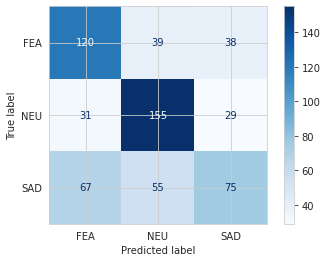

Overall accuracy
0.5747126436781609


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('HAP', 'NEU', 'SAD')


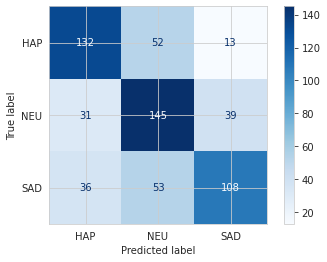

Overall accuracy
0.632183908045977


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'FEA', 'HAP')


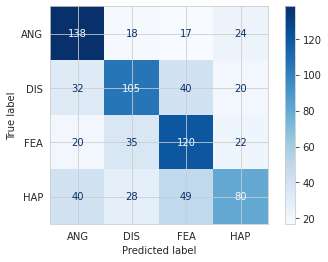

Overall accuracy
0.5621827411167513


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'FEA', 'NEU')


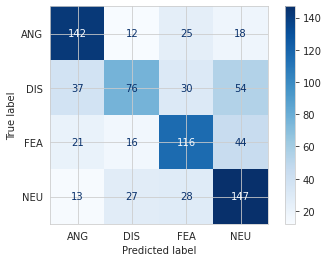

Overall accuracy
0.5967741935483871


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'FEA', 'SAD')


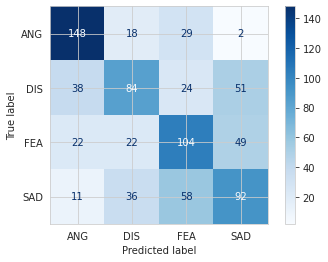

Overall accuracy
0.5431472081218274


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'HAP', 'NEU')


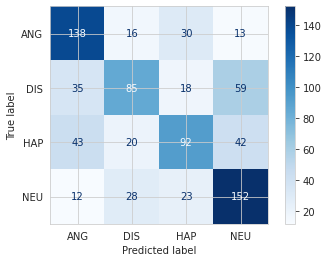

Overall accuracy
0.5794044665012407


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'HAP', 'SAD')


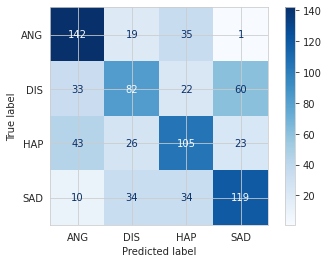

Overall accuracy
0.5685279187817259


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'NEU', 'SAD')


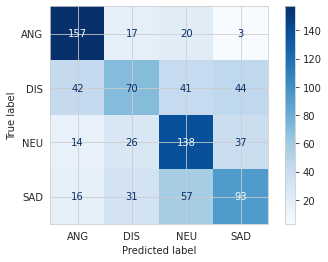

Overall accuracy
0.5682382133995038


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'FEA', 'HAP', 'NEU')


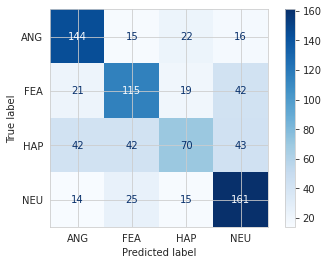

Overall accuracy
0.607940446650124


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'FEA', 'HAP', 'SAD')


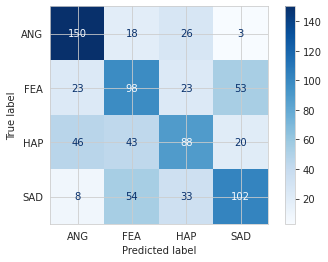

Overall accuracy
0.5558375634517766


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'FEA', 'NEU', 'SAD')


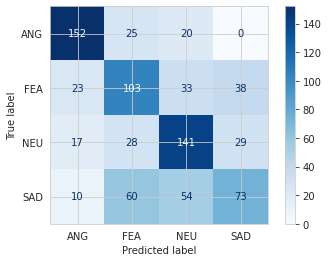

Overall accuracy
0.5818858560794045


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'HAP', 'NEU', 'SAD')


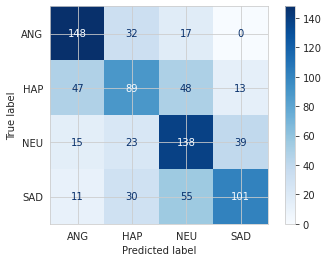

Overall accuracy
0.5905707196029777


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'FEA', 'HAP', 'NEU')


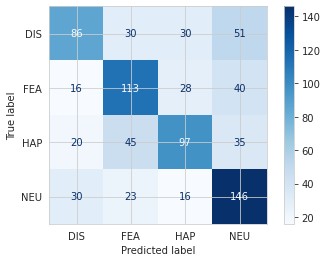

Overall accuracy
0.5483870967741935


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'FEA', 'HAP', 'SAD')


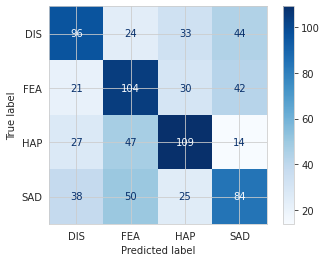

Overall accuracy
0.4987309644670051


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'FEA', 'NEU', 'SAD')


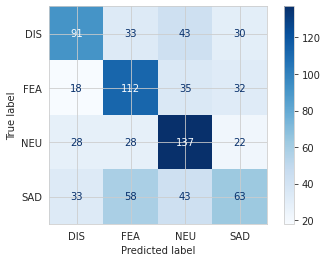

Overall accuracy
0.5


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'HAP', 'NEU', 'SAD')


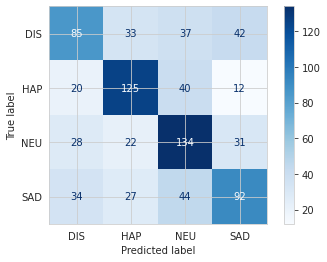

Overall accuracy
0.5409429280397022


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('FEA', 'HAP', 'NEU', 'SAD')


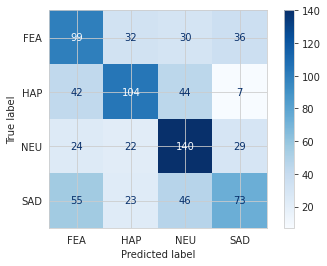

Overall accuracy
0.5161290322580645


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'FEA', 'HAP', 'NEU')


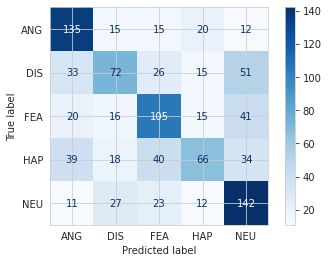

Overall accuracy
0.518444666001994


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'FEA', 'HAP', 'SAD')


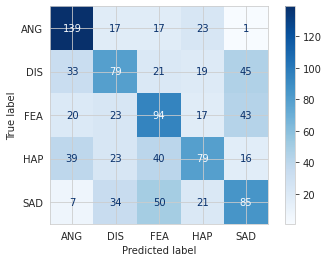

Overall accuracy
0.483248730964467


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'FEA', 'NEU', 'SAD')


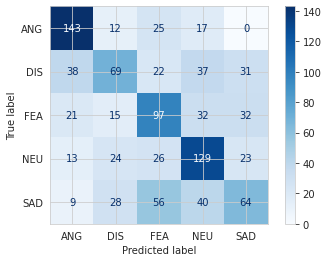

Overall accuracy
0.5004985044865404


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'HAP', 'NEU', 'SAD')


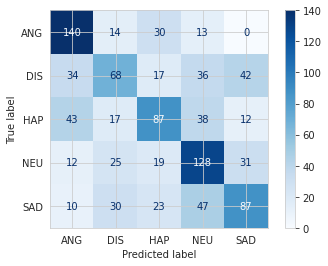

Overall accuracy
0.5084745762711864


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'FEA', 'HAP', 'NEU', 'SAD')


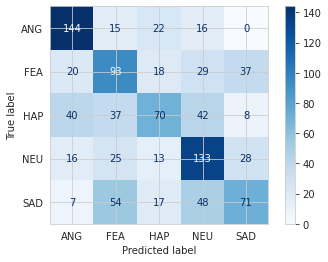

Overall accuracy
0.5094715852442672


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('DIS', 'FEA', 'HAP', 'NEU', 'SAD')


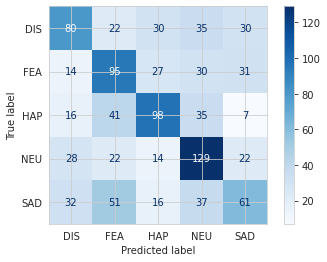

Overall accuracy
0.46161515453639085


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


('ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD')


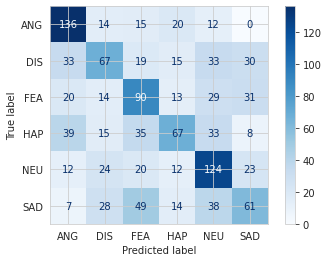

Overall accuracy
0.45416666666666666


In [26]:
models_test_final = []
accuracies_test_final = []
for n in range(2,7):
    acc_list = []
    mod_list = []
    for emotion_list in itertools.combinations(emotions, n):
        # Original dataset
        y_train = data[['Emotion']]
        y_test_final  = data_test_final[['Emotion']]

        X_train = data.drop(columns  = ['FileID','actorID', 'Emotion', 'SentenceID'])
        X_test_final  = data_test_final.drop(columns   = ['FileID','actorID', 'Emotion', 'SentenceID'])

        # Drop most emotions
        I_train = y_train.isin(emotion_list)
        I_test = y_test_final.isin(emotion_list)

        X_train = X_train[I_train.values]
        X_test_final = X_test_final[I_test.values]

        y_train = y_train.loc[y_train.Emotion.isin(emotion_list),:]
        y_test_final = y_test_final.loc[y_test_final.Emotion.isin(emotion_list),:]

        # Build pipeline to first scale the mid feature data, then apply the SVC
        pipe = Pipeline([('scale', StandardScaler()),
                         ('svc', SVC(kernel='rbf'))])
        classifier = pipe.fit(X_train, y_train)
        pred = pipe.predict(X_test_final)

        # Look at the confusion matrix for the test data :
        cnf_matrix_test = confusion_matrix(y_test_final, pred)

        # Plot confusion matrix
        print(emotion_list)
        disp = plot_confusion_matrix(classifier, X_test_final, y_test_final,
                                         display_labels=emotion_list,
                                         cmap=plt.cm.Blues)
        plt.show()

        M = confusion_matrix(y_test_final, classifier.predict(X_test_final))
        print('Overall accuracy')
        acc = np.sum(np.diag(M))/np.sum(M[:])
        print(acc)

        acc_list.append((emotion_list, acc))
        mod_list.append((emotion_list, classifier))
    accuracies_test_final.append(acc_list)
    models_test_final.append(mod_list)

In [54]:
for n in range(2,7):
    acc_list = accuracies_test_final[n-2]
    print('Chance with n=%i' %n)
    print(round(1/n,2))
    print('Obtained:')
    print(round(np.mean([acc[1] for acc in acc_list]),2))

Chance with n=2
0.5
Obtained:
0.77
Chance with n=3
0.33
Obtained:
0.64
Chance with n=4
0.25
Obtained:
0.56
Chance with n=5
0.2
Obtained:
0.5
Chance with n=6
0.17
Obtained:
0.45


In [34]:
# means = [np.mean([acc[1] for acc in acc_list]) for acc_list in accuracies]
# means_test_final = [np.mean([acc[1] for acc in acc_list]) for acc_list in accuracies_test_final]

means = []
for n in range(len(accuracies)):
    acc_list = accuracies[n]
    means.append(np.mean([acc[1] for acc in acc_list]))

means_test_final = []
for n in range(len(accuracies_test_final)):
    acc_list = accuracies_test_final[n]
    means_test_final.append(np.mean([acc[1] for acc in acc_list]))


Text(0, 0.5, 'Test set')

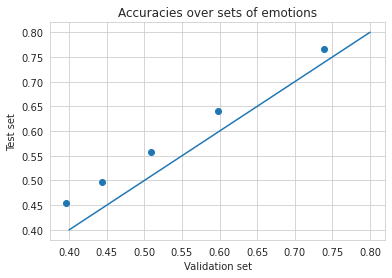

In [35]:
plt.scatter(means, means_test_final)

tt = np.linspace(0.4,0.8)
plt.plot(tt,tt)

plt.title('Accuracies over sets of emotions')
plt.xlabel('Validation set')
plt.ylabel('Test set')

In [143]:
acc_vector = []
for n in range(len(accuracies)):
    row = accuracies[n]
    acc_row = []
    for i in range(len(row)):
        acc_row.append(row[i][1])
    acc_vector.append(acc_row)

acc_vector_final = []
for n in range(len(accuracies_test_final)):
    row = accuracies_test_final[n]
    acc_row = []
    for i in range(len(row)):
        acc_row.append(row[i][1]*100)
    acc_vector_final.append(acc_row)

In [144]:
acc_vector_final

[[81.21827411167513,
  83.50253807106598,
  75.88832487309645,
  87.62135922330097,
  89.59390862944161,
  74.61928934010153,
  76.90355329949239,
  71.35922330097088,
  68.78172588832487,
  70.81218274111674,
  80.09708737864078,
  65.73604060913706,
  77.18446601941747,
  77.66497461928934,
  69.66019417475728],
 [67.51269035532995,
  64.9746192893401,
  67.15927750410509,
  65.48223350253807,
  63.95939086294417,
  73.07060755336617,
  65.65143824027074,
  67.65188834154351,
  68.8663282571912,
  70.27914614121511,
  60.74450084602368,
  62.5615763546798,
  55.83756345177665,
  63.54679802955665,
  61.082910321489,
  57.799671592775034,
  65.35303776683087,
  58.03722504230119,
  57.47126436781609,
  63.2183908045977],
 [56.21827411167513,
  59.67741935483871,
  54.314720812182735,
  57.940446650124066,
  56.852791878172596,
  56.82382133995038,
  60.7940446650124,
  55.58375634517766,
  58.188585607940446,
  59.05707196029777,
  54.83870967741935,
  49.87309644670051,
  50.0,
  54.

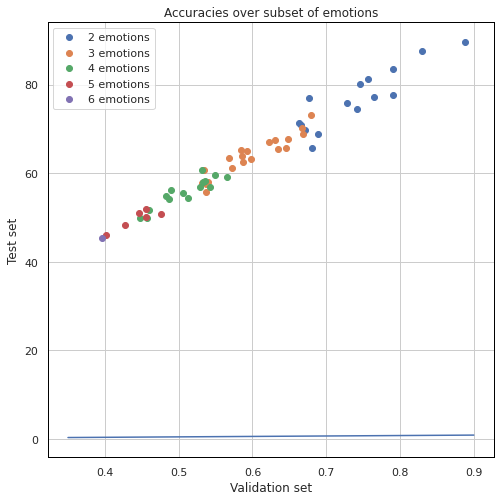

[45.416666666666664]

In [145]:
plt.figure(figsize=(8, 8))
for n in range(len(acc_vector)):
    vec_val = acc_vector[n]
    vec_test = acc_vector_final[n]
    
    plt.scatter(vec_val, vec_test)

plt.xlabel('Validation set')
plt.ylabel('Test set')
plt.title('Accuracies over subset of emotions')

tt = np.linspace(0.35,0.9)
plt.plot(tt,tt)

plt.savefig('Validation vs Test accuracy.png')
plt.legend(['2 emotions','3 emotions','4 emotions','5 emotions','6 emotions'])

plt.show()
plt.rcParams["axes.linewidth"] = 1.5
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams['font.size'] = '14'

vec_test

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


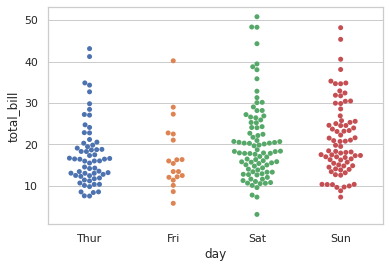

In [146]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.swarmplot(x="day", y="total_bill", data=tips)

tips

In [147]:
print(acc_vector_final [0])  
len(acc_vector_final [0])

[81.21827411167513, 83.50253807106598, 75.88832487309645, 87.62135922330097, 89.59390862944161, 74.61928934010153, 76.90355329949239, 71.35922330097088, 68.78172588832487, 70.81218274111674, 80.09708737864078, 65.73604060913706, 77.18446601941747, 77.66497461928934, 69.66019417475728]


15

In [148]:
print(acc_vector_final [1])  
len(acc_vector_final [1])

[67.51269035532995, 64.9746192893401, 67.15927750410509, 65.48223350253807, 63.95939086294417, 73.07060755336617, 65.65143824027074, 67.65188834154351, 68.8663282571912, 70.27914614121511, 60.74450084602368, 62.5615763546798, 55.83756345177665, 63.54679802955665, 61.082910321489, 57.799671592775034, 65.35303776683087, 58.03722504230119, 57.47126436781609, 63.2183908045977]


20

In [149]:
print(acc_vector_final [2])  
len(acc_vector_final [2])

[56.21827411167513, 59.67741935483871, 54.314720812182735, 57.940446650124066, 56.852791878172596, 56.82382133995038, 60.7940446650124, 55.58375634517766, 58.188585607940446, 59.05707196029777, 54.83870967741935, 49.87309644670051, 50.0, 54.09429280397022, 51.61290322580645]


15

In [150]:
print(acc_vector_final [3])  
len(acc_vector_final [3])

[51.844466600199404, 48.3248730964467, 50.04985044865404, 50.847457627118644, 50.94715852442672, 46.16151545363908]


6

In [151]:
print(acc_vector_final [4])  
len(acc_vector_final [4])

[45.416666666666664]


1

In [152]:
type(acc_vector_final)

list

/home/mnoorani/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2825: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


ValueError: x and y must be the same size

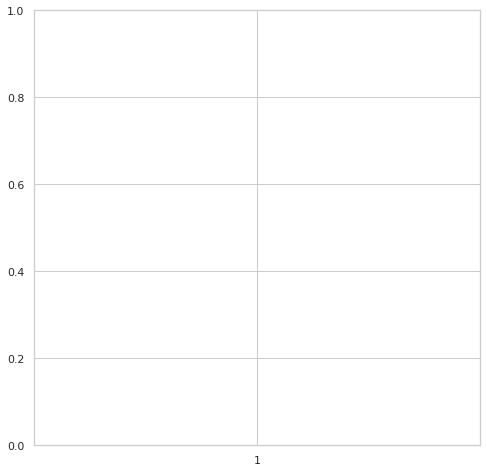

In [153]:
plt.figure(figsize=(8, 8))
#for n in range(len(acc_vector)):
#    vec_val = acc_vector[n]
#    vec_test = acc_vector_final[n]
#    
#    plt.scatter(vec_val, vec_test)

plt.scatter('1', acc_vector_final)
    
    
plt.xlabel('Validation set')
plt.ylabel('Test set')
plt.title('Accuracies over subset of emotions')


plt.savefig('Validation vs Test accuracy.png')
plt.legend(['2 emotions','3 emotions','4 emotions','5 emotions','6 emotions'])

plt.show()
plt.rcParams["axes.linewidth"] = 1.5
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams['font.size'] = '14'



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


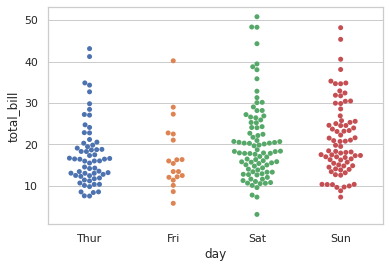

In [154]:
import seaborn as sns
sns.set_theme(style="whitegrid")

df = pd.DataFrame(acc_vector_final)

tips = sns.load_dataset("tips")
ax = sns.swarmplot(x="day", y="total_bill", data=tips)

tips

In [155]:
data = [['2 emotions', acc_vector_final[0]],
        ['3 emotions', acc_vector_final[1]],
        ['4 emotions', acc_vector_final[2]],
        ['5 emotions', acc_vector_final[3]],
        ['6 emotions', acc_vector_final[4]]]

In [156]:
df = pd.DataFrame(data, columns=['emotion', 'values'])
df

,emotion,values
0,2 emotions,"[81.21827411167513, 83.50253807106598, 75.8883..."
1,3 emotions,"[67.51269035532995, 64.9746192893401, 67.15927..."
2,4 emotions,"[56.21827411167513, 59.67741935483871, 54.3147..."
3,5 emotions,"[51.844466600199404, 48.3248730964467, 50.0498..."
4,6 emotions,[45.416666666666664]


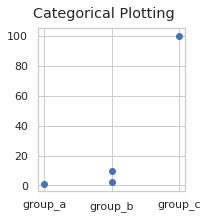

In [157]:
names = ['group_a', 'group_b','group_b', 'group_c']
values = [1, 2, 10, 100]

plt.figure(figsize=(9, 3))


plt.subplot(132)
plt.scatter(names, values)
plt.suptitle('Categorical Plotting')
plt.show()


In [158]:
an_array = np.array(acc_vector_final)
multiplied_array = an_array * 100

multiplied_array

/tmp/ipykernel_1239763/1794444270.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  an_array = np.array(acc_vector_final)


array([list([81.21827411167513, 83.50253807106598, 75.88832487309645, 87.62135922330097, 89.59390862944161, 74.61928934010153, 76.90355329949239, 71.35922330097088, 68.78172588832487, 70.81218274111674, 80.09708737864078, 65.73604060913706, 77.18446601941747, 77.66497461928934, 69.66019417475728, 81.21827411167513, 83.50253807106598, 75.88832487309645, 87.62135922330097, 89.59390862944161, 74.61928934010153, 76.90355329949239, 71.35922330097088, 68.78172588832487, 70.81218274111674, 80.09708737864078, 65.73604060913706, 77.18446601941747, 77.66497461928934, 69.66019417475728, 81.21827411167513, 83.50253807106598, 75.88832487309645, 87.62135922330097, 89.59390862944161, 74.61928934010153, 76.90355329949239, 71.35922330097088, 68.78172588832487, 70.81218274111674, 80.09708737864078, 65.73604060913706, 77.18446601941747, 77.66497461928934, 69.66019417475728, 81.21827411167513, 83.50253807106598, 75.88832487309645, 87.62135922330097, 89.59390862944161, 74.61928934010153, 76.90355329949239,

In [159]:
import numpy
 
list = [1,2,3,4,5,6,7,8,9]
 
result = numpy.prod(list)
 
print(result)

362880


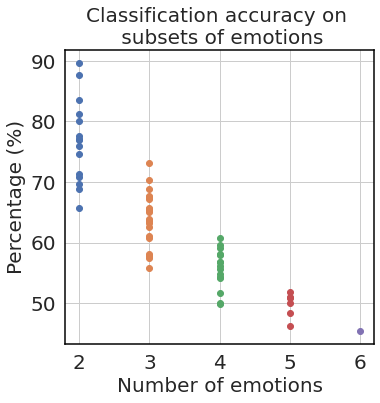

In [204]:



cat2 = ['2']*len(acc_vector_final[0])
cat3 = ['3']*len(acc_vector_final[1])
cat4 = ['4']*len(acc_vector_final[2])
cat5 = ['5']*len(acc_vector_final[3])
cat6 = ['6']*len(acc_vector_final[4])


acc2 = acc_vector_final[0]
acc3 = acc_vector_final[1]
acc4 = acc_vector_final[2]
acc5 = acc_vector_final[3]
acc6 = acc_vector_final[4]

#plt.figure(figsize=(12, 5))

fig, ax = plt.subplots(figsize=(6, 6))

plt.xlabel('xlabel', fontsize=20)
plt.ylabel('ylabel', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Number of emotions')
plt.ylabel('Percentage (%)')
plt.rcParams["axes.linewidth"] = 1.5
plt.rcParams["axes.edgecolor"] = "black"
plt.title('Classification accuracy on \n subsets of emotions', fontsize=20)



fig.tight_layout()

plt.scatter(cat2, acc2)
plt.scatter(cat3, acc3)
plt.scatter(cat4, acc4)
plt.scatter(cat5, acc5)
plt.scatter(cat6, acc6)

plt.show()





In [129]:
len(acc_vector_final[0])

15